# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.                    
Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
### The attributes are as follows: 
    Sales            -- Unit sales (in thousands) at each location
    Competitor Price -- Price charged by competitor at each location
    Income           -- Community income level (in thousands of dollars)
    Advertising      -- Local advertising budget for company at each location (in thousands of dollars)
    Population       -- Population size in region (in thousands)
    Price            -- Price company charges for car seats at each site
    Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location 
                                for the car seats at each site
    Age              -- Average age of the local population
    Education        -- Education level at each location
    Urban            -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    US               -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Data

In [2]:
raw_data = pd.read_csv('Company_Data.csv')
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Cleaning

In [3]:
raw_data['Sales'] = (raw_data['Sales'] >= 7.5).map({True : '>=7.5K', False : '<7.5K'})
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,>=7.5K,138,73,11,276,120,Bad,42,17,Yes,Yes
1,>=7.5K,111,48,16,260,83,Good,65,10,Yes,Yes
2,>=7.5K,113,35,10,269,80,Medium,59,12,Yes,Yes
3,<7.5K,117,100,4,466,97,Medium,55,14,Yes,Yes
4,<7.5K,141,64,3,340,128,Bad,38,13,Yes,No


# Exploratory Data Analysis

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [5]:
raw_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,<7.5K,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,201,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,NaN,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,NaN,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,NaN,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,NaN,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,NaN,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,NaN,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


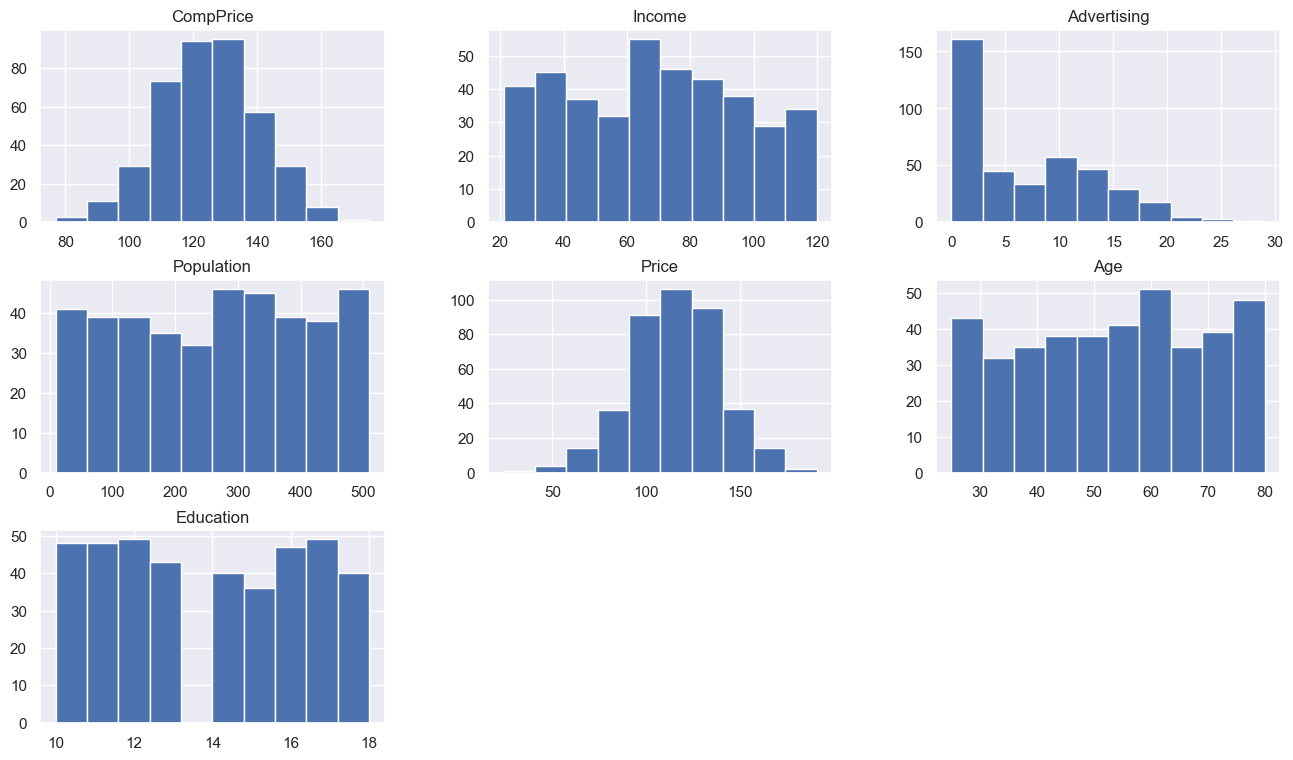

In [6]:
raw_data.hist(figsize=(16,9))
plt.show()

In [7]:
raw_data['Sales'].unique()

array(['>=7.5K', '<7.5K'], dtype=object)

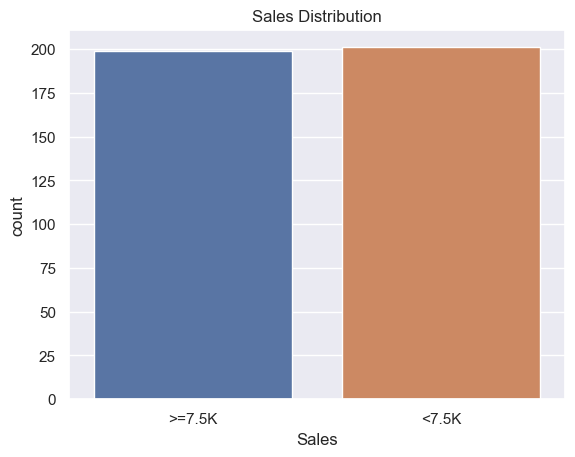

In [8]:
sns.countplot(x='Sales',y=None, data = raw_data)
plt.title('Sales Distribution')
plt.show()

In [9]:
raw_data['Sales'].value_counts()

<7.5K     201
>=7.5K    199
Name: Sales, dtype: int64

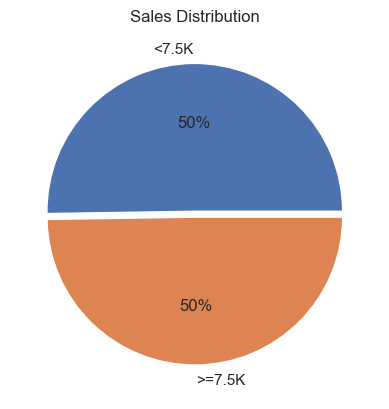

In [10]:
plt.pie(x =raw_data['Sales'].value_counts(),labels=['<7.5K','>=7.5K'],autopct='%1.0f%%',explode=[0.02,0.02])
plt.title('Sales Distribution')
plt.show()

# Data Preprocessing

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
num_attribs = ['CompPrice','Income','Advertising','Population','Price','Age','Education']
cat_attribs = ['ShelveLoc','Urban','US']
labels = ['Sales']
full_pipeline = ColumnTransformer([("num", StandardScaler(), num_attribs),
                                   ("cat", OneHotEncoder(drop='if_binary'), cat_attribs),
                                   ("tar", OneHotEncoder(drop='if_binary'), labels)
                                  ], sparse_threshold= 0)
data = full_pipeline.fit_transform(raw_data)

In [13]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,1.0,0.0,0.0,1.0,1.0,1.0
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,0.0,1.0,0.0,1.0,1.0,1.0
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,0.0,0.0,1.0,1.0,1.0,1.0
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,0.0,0.0,1.0,1.0,1.0,0.0
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,1.0,0.0,0.0,1.0,0.0,0.0


# Defining Dependent and Independent Variables

In [14]:
x = data.drop(12, axis = 1)
y = data[12]

# Splitting the Data for Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = raw_data['Sales'], random_state = 42)

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=-1, random_state=42)

# Confusion Matrix and Classification Report

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[159,   2],
       [  0, 159]], dtype=int64)

In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       161
         1.0       0.99      1.00      0.99       159

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



# Model Testing

In [19]:
y_test_pred = clf.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[30, 10],
       [ 7, 33]], dtype=int64)

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        40
         1.0       0.77      0.82      0.80        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



# Hyper Parameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = RandomForestClassifier(),
                              param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6],
                                          'n_estimators' : range(20,51)}
                             )
grid_search_cv.fit(x_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

In [22]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 29)

In [23]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=29)

In [24]:
confusion_matrix(y_test, clf.predict(x_test))

array([[32,  8],
       [ 6, 34]], dtype=int64)

In [25]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        40
         1.0       0.81      0.85      0.83        40

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80

